In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ts1 = [0.1*np.random.normal()]
ts1

[-0.0556524289420965]

In [6]:
for _ in range(100):
    noise = np.random.normal()
    ts1.append(ts1[-1]+ noise)

In [7]:
ts1

[-0.0556524289420965,
 -0.41909299230521807,
 0.46784295730422415,
 0.6855491674889517,
 1.180279515813097,
 -1.0404836492074343,
 0.4841800256955544,
 -0.12227101957620834,
 -1.2215648519195224,
 -0.7196074560106207,
 -0.30993292037588055,
 -1.0615670588661634,
 -1.3962467240873189,
 -1.629246674370332,
 -0.13591040002844945,
 -0.4904994509631523,
 -0.7411845969907198,
 -0.31028147753348756,
 1.4925047259836144,
 1.7244798566645707,
 3.5000254847667396,
 3.2729643560594184,
 3.074966625195458,
 2.096999845294813,
 1.6095889799704048,
 0.9273901086048341,
 0.10910507700563765,
 -1.192788412561948,
 -2.4705099480937815,
 -0.7311215482514888,
 -1.9945131326515513,
 -3.4759625719164067,
 -3.6474804443650215,
 -3.5848343339294675,
 -3.0483388035835715,
 -2.676243318437698,
 -2.653061705694357,
 -2.66121934631636,
 -1.0757185888497172,
 -2.4643353301031086,
 -2.2585406896572464,
 -1.83228716231627,
 -2.5380308915195737,
 -2.8688405713651868,
 -2.4183128655827995,
 -3.6140312738791236,
 -4.4

In [31]:
# X데이터
np.random.seed(seed=100) 
ts1 = [0.1*np.random.normal()]
for _ in range(100):
    noise = np.random.normal() # 노이즈 생성
    ts1.append(0.5*ts1[-1]+ 0.1*noise)

In [32]:
# Y데이터(lag=3)
ts2 = [value + 0.1*np.random.normal() for value in ts1]

[-0.288602647988206,
 -0.3505517807250732,
 0.09202519141025836,
 -0.005785738559763741,
 0.0626659992669816,
 0.11850648563838893,
 0.07697121248783492,
 -0.03789262562077462,
 -0.129005712462262,
 -0.13102118363255605,
 -0.03697975565248761,
 -0.022102011186569282,
 -0.1668231121212974,
 0.021026130086725145,
 -0.031044058836506072,
 0.19620510212734077,
 0.03500503230897646,
 -0.11000187167879324,
 -0.014390567598444513,
 -0.2663486452805275,
 0.31042604150310676,
 0.06733790528345879,
 -0.03138619249591,
 -0.06894935777256159,
 -0.14699385620898162,
 0.18656511457934497,
 0.11699259425164384,
 0.2850815595144796,
 0.14115640053402942,
 -0.11161089234833484,
 -0.07806806394367226,
 0.0059648259851328295,
 -0.042238384278640934,
 -0.1088129854055879,
 0.06577417324516086,
 -0.15560286378190152,
 0.12732846600584247,
 -0.03608609066585511,
 -0.14806808938775526,
 -0.36026560996375334,
 -0.22790056740755393,
 -0.07076683086822158,
 -0.11744536592928956,
 0.10936880609963769,
 0.0465897

In [33]:
ts1 = ts1[3:]
ts2 = ts2[:-3] # lag 3 으로 조정

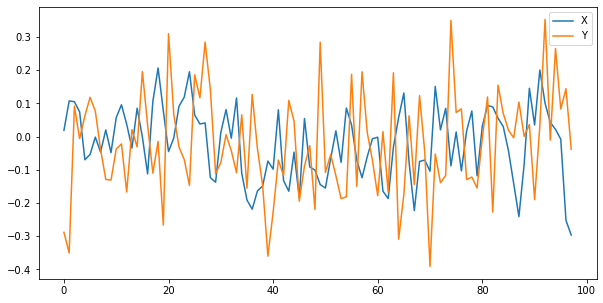

In [61]:
plt.figure(figsize=(10,5))
plt.plot(ts1, label='X')
plt.plot(ts2, label='Y')
plt.legend()
plt.show()

In [62]:
ts_df = pd.DataFrame(data=zip(ts2,ts1),columns=['ts2','ts1'])
ts_df.head()

,ts2,ts1
0,-0.288603,0.019103
1,-0.350552,0.107684
2,0.092025,0.105264
3,-0.005786,0.074750
4,0.062666,-0.069629


In [63]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(ts_df,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7818  , p=0.1852  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=1.8386  , p=0.1751  , df=1
likelihood ratio test: chi2=1.8214  , p=0.1771  , df=1
parameter F test:         F=1.7818  , p=0.1852  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2621  , p=0.0428  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=6.8826  , p=0.0320  , df=2
likelihood ratio test: chi2=6.6471  , p=0.0360  , df=2
parameter F test:         F=3.2621  , p=0.0428  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=41.3459 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=133.9043, p=0.0000  , df=3
likelihood ratio test: chi2=83.5456 , p=0.0000  , df=3
parameter F test:         F=41.3459 , p=0.0000  , df_denom=88, df_num=3


In [57]:
import FinanceDataReader as fdr
df_ss = fdr.DataReader('010950', '2021','2022')
df_ss

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,69700,70900,68900,70300,622220,0.015896
2021-01-05,69900,70800,69500,70800,482236,0.007112
2021-01-06,74800,76900,73100,73700,2229599,0.040960
2021-01-07,75300,76700,74700,75000,1210398,0.017639
2021-01-08,75900,76100,74100,75200,963767,0.002667
...,...,...,...,...,...,...
2021-12-24,88900,89200,88000,88700,204054,0.001129
2021-12-27,88600,88700,87100,87400,183489,-0.014656
2021-12-28,88000,89700,87600,89200,454246,0.020595


In [58]:
# 유가
df_oil = pd.read_csv('./data/daum_oil.csv',parse_dates=['date'],index_col=1)
df_oil = df_oil[df_oil['company']=='WTI원유선물'].loc['2021']
df_oil

,company,종가,전일비,등락률
date,,,,
2021-12-31,WTI원유선물,75.21,-1.78,-2.31
2021-12-30,WTI원유선물,76.99,0.43,0.56
2021-12-29,WTI원유선물,76.56,0.58,0.76
2021-12-28,WTI원유선물,75.98,0.41,0.54
2021-12-27,WTI원유선물,75.57,1.78,2.41
...,...,...,...,...
2021-01-08,WTI원유선물,52.24,1.41,2.77
2021-01-07,WTI원유선물,50.83,0.20,0.40
2021-01-06,WTI원유선물,50.63,0.70,1.40


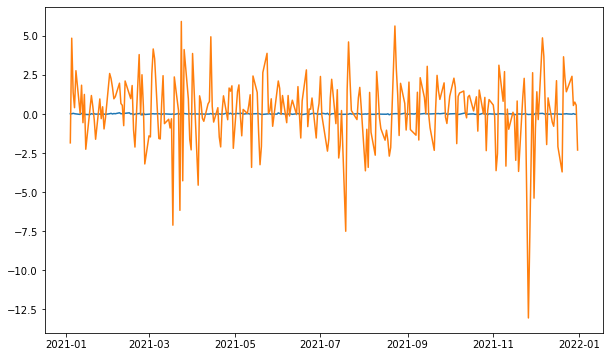

In [59]:
plt.figure(figsize=(10,6))
plt.plot(df_ss.Change)
plt.plot(df_oil['등락률'])